In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import glob
import os
%run /Users/sophi/Documents/Duke/Haase_Lab/python_functions/heatmap.py

## Cryptococcus Extremal Events DLxJTK and Annotation

**Data**: Lifeline extremal events cryptococcus data (with clock on the wall timepoints, because lifeline points aren't evenly spaced). Trimmed timepoint 0, to remove stress response.


**DlxJTK**: Ran DlxJTK using periods 60, 70, 80 minutes (clock on the wall time), which corresponds to 142, 157, 171 lifeline points.


**Filtering**: Subsetted on the union of the following gene lists (using orthologs to S. cerevisiae genes from Kelliher S4): transcription factor list from Jung 2015 and Clns, Clbs, APC, WP genes from Rob's annotation file IDV_sort_filter.

In [11]:
### data & results
data =  pd.read_csv("/Users/sophi/OneDrive/WIP/crypto/data/crypto_rnaseq_norm_trim.tsv", sep="\t", index_col = 0)
dlxjtk = pd.read_csv("/Users/sophi/OneDrive/WIP/crypto/results/node_finding_20220308090355/dlxjtk_results.tsv", sep="\t", index_col = 0, comment = "#")
dlxjtk=dlxjtk.sort_values(by="dlxjtk_score")

### Gene lists
tf_jung =  pd.read_excel("/Users/sophi/OneDrive/WIP/crypto/genelists/JungEtAl_2015_TFlist_Supp1.xlsx", index_col = 0)
IDV_filter_sort = pd.read_csv("/Users/sophi/OneDrive/WIP/crypto/genelists/IDV_filter_sort_file.tsv", sep="\t", index_col = 0, comment = "#")
conv_KS4 =  pd.read_excel("/Users/sophi/OneDrive/WIP/crypto/genelists/Kelliher2016_S4_Table_ortho.xlsx", index_col = 0, header = 2)
conv = conv_KS4.reset_index().set_index("Scerevisiae_ID").iloc[:, 0:1]


#### Heatmap For Top DLxJTK Results

Text(0.5, 60.0, 'timepoints')

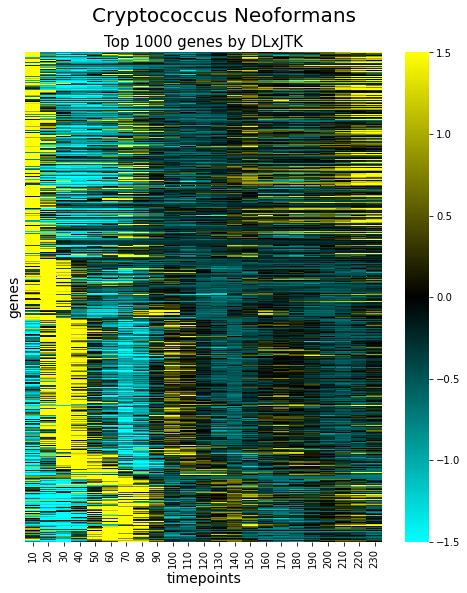

In [3]:
f = plt.figure(figsize = (8, 9))
f.suptitle("Cryptococcus Neoformans", fontsize = 20, y =.95, x = .47)
plt.title("Top 1000 genes by DLxJTK", fontsize = 15)
x = heatmap_max(data, dlxjtk.iloc[0:1000].index, 70, cbar_bool = True)
plt.ylabel("genes", fontsize = 14)
plt.xlabel("timepoints", fontsize = 14)

#### Filtering DLxJTK Results

In [12]:
### TFs from Jung 2015
dlxjtk_tf_jung = dlxjtk.loc[tf_jung.index]
dlxjtk_tf_jung["Annotation"] = "Transcription Factor (Jung 2015)"

In [13]:
### Clns & Clbs
Cln_clb = IDV_filter_sort.loc[IDV_filter_sort["ClN/CLBs_filter"].notnull()]
conv_cln_clb = pd.DataFrame()
for gene in Cln_clb.index:
    if gene in conv.index:
        gene_conv = conv.loc[gene]
        conv_cln_clb=conv_cln_clb.append(gene_conv)
        
        
conv_cln_clb["Annotation"]=Cln_clb["ClN/CLBs_filter"]
conv_cln_clb=conv_cln_clb.set_index("Cneoformans_ID")
dlxjtk_cln_clb = dlxjtk.loc[conv_cln_clb.index]
dlxjtk_cln_clb["Annotation"] =conv_cln_clb["Annotation"] 

In [18]:
### Wavepool
WP = IDV_filter_sort.loc[IDV_filter_sort["Wavepool_filter"].notnull()]
conv_wp = pd.DataFrame()
for gene in WP.index:
    if gene in conv.index:
        gene_conv = conv.loc[gene]
        conv_wp = conv_wp.append(gene_conv)
        
conv_wp=conv_wp.set_index("Cneoformans_ID")

dlxjtk_wp = dlxjtk.loc[conv_wp.index]
dlxjtk_wp["Annotation"] ="wavepool"

In [34]:
### APC
conv_apc = conv.loc["CDC20"]
conv_apc = conv_apc.set_index("Cneoformans_ID")
dlxjtk_apc = dlxjtk.loc[conv_apc.index]
dlxjtk_apc["Annotation"] ="APC"

In [45]:
filtered_dlxjtk = dlxjtk_tf_jung.append(dlxjtk_cln_clb).append(dlxjtk_wp).append(dlxjtk_apc)
filtered_dlxjtk

,dl_reg_pval,dl_reg_pval_norm,jtk_per_pval,jtk_per_pval_norm,dlxjtk_score,Annotation
CNAG_02566,0.057618,0.076650,0.007155,0.007155,1.681921e+02,Transcription Factor (Jung 2015)
CNAG_00791,0.499006,0.663838,1.000000,1.000000,2.925410e+11,Transcription Factor (Jung 2015)
CNAG_01069,0.999992,1.330309,0.146231,0.146231,7.362082e+09,Transcription Factor (Jung 2015)
CNAG_07464,0.041215,0.054829,0.007155,0.007155,6.156975e+01,Transcription Factor (Jung 2015)
CNAG_03401,0.998932,1.328899,1.000000,1.000000,2.346802e+12,Transcription Factor (Jung 2015)
...,...,...,...,...,...,...
CNAG_05093,1.000000,1.330320,0.045682,0.045682,2.245521e+08,wavepool
CNAG_05176,0.129363,0.172094,0.000413,0.000413,2.463249e+00,wavepool
CNAG_03229,0.989568,1.316442,1.000000,1.000000,2.281422e+12,wavepool
CNAG_03191,0.678319,0.902381,0.181897,0.181897,4.422422e+09,APC


In [44]:
with open("/Users/sophi/OneDrive/WIP/crypto/results/node_finding_20220308090355/dlxjtk_filtered.tsv", 'w') as f:
    f.write('### DLXJTK Run: node_finding_20220308090355 \n ## Filtered using Jung 2015 Tfs, Clns/Clbs&wavepool from Robs IDV filter sort file, and APC \n')
filtered_dlxjtk.to_csv('/Users/sophi/OneDrive/WIP/crypto/results/node_finding_20220308090355/dlxjtk_filtered.tsv', mode='a', sep="\t")